<a href="https://colab.research.google.com/github/nedokormysh/Skillbox_DS_intro_intensive/blob/main/Skillbox_DS_Day_2_29_03_22_%2B_Day_3_30_03_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2

Данные 

https://drive.google.com/file/d/1Mccq5uUsWbsDlSbmEsMer1U_IkxZXAyr/view?usp=sharing

Или

https://disk.yandex.com/d/-834NzVzgyKAaw



Источник
https://www.cryptodatadownload.com/data/bitfinex/

In [ ]:
# Сначала — загрузить файл в колаб
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

In [ ]:
import pandas as pd
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)

####
bitcoin.set_index("unix", inplace=True)
bitcoin = bitcoin[::-1]  #  Вернуть строчки в обратном порядке
bitcoin.reset_index(inplace=True) 
bitcoin.drop("unix", axis=1, inplace=True)
####

bitcoin.date = pd.to_datetime(bitcoin.date)


bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11


In [ ]:
bitcoin.describe()

,open,high,low,close,Volume USD,Volume BTC
count,2256.000000,2256.000000,2256.000000,2256.000000,2.256000e+03,2256.000000
mean,7115.664125,7341.591874,6879.407790,7142.245854,1.215246e+08,20366.374715
std,10064.253430,10418.852532,9708.909314,10125.430503,1.988147e+08,21498.610698
min,212.630000,223.200000,162.000000,212.630000,0.000000e+00,0.000000
25%,630.035000,643.495000,618.022500,631.162500,9.853729e+06,6685.973840
50%,5246.250000,5396.875000,5072.600000,5282.300000,4.414414e+07,13150.671761
75%,9185.175000,9377.875000,8947.450000,9186.475000,1.347245e+08,26326.685000
max,61203.000000,61699.000000,59859.000000,61202.887014,2.223208e+09,266768.610000


In [ ]:
# bitcoin.open, это тоже самое что bitcoin["open"]

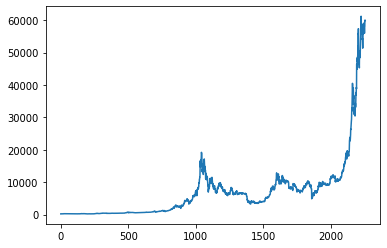

In [ ]:
bitcoin.open.plot()

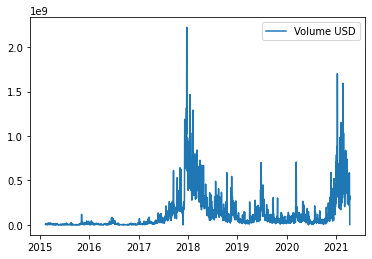

In [ ]:
import matplotlib.pyplot as plt

plt.plot(bitcoin.date, bitcoin["Volume USD"], label="Volume USD")
plt.legend()  #  Отобразить легенда
plt.show()  #  Отобразить график

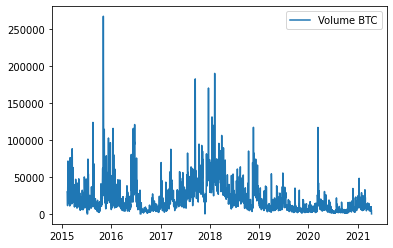

In [ ]:
plt.plot(bitcoin.date, bitcoin["Volume BTC"], label="Volume BTC")
plt.legend()  #  Отобразить легенда
plt.show()  #  Отобразить график

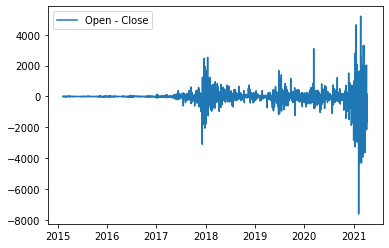

In [ ]:
plt.plot(bitcoin.date, bitcoin.open - bitcoin.close, label="Open - Close")
plt.legend()  #  Отобразить легенда
plt.show()  #  Отобразить график

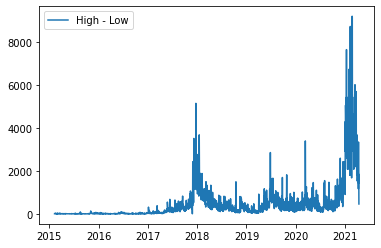

In [ ]:
plt.plot(bitcoin.date, bitcoin.high - bitcoin.low, label="High - Low")
plt.legend()  #  Отобразить легенда
plt.show()  #  Отобразить график

In [ ]:
# Feature Enginnering
# Добавляем новые колонки в датасет на основе имеющихся колонок

bitcoin["open_close_diff"] = bitcoin["open"] -  bitcoin["close"] 
bitcoin["high_low_diff"] = bitcoin["high"] - bitcoin["low"]
bitcoin["open_to_high"] = bitcoin["open_close_diff"] / bitcoin["high_low_diff"]

In [ ]:
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_close_diff,high_low_diff,open_to_high
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,0.376042
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,-0.035425
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,0.280952
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,-0.639775
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,-0.670443


In [ ]:
bitcoin["high_mean_7d"] = bitcoin["high"].shift(1).rolling(window=7).mean()  #  Средняя цена за 7 дней
bitcoin["max_open_14d"] = bitcoin["open"].shift(1).rolling(window=14).max() 
bitcoin["min_close_14d"] = bitcoin["close"].shift(1).rolling(window=14).min()

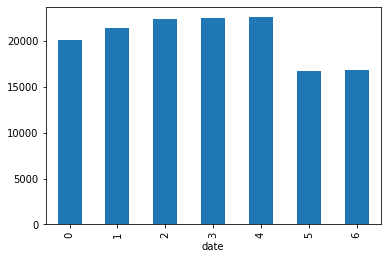

In [ ]:
bitcoin.groupby(bitcoin["date"].dt.weekday)["Volume BTC"].mean().plot(kind="bar")

In [ ]:
# ДЗ: добавить колонки по году и месяцу и дню недели
# bitcoin["date"].dt.year
# bitcoin["date"].dt.month

In [ ]:
for day in range(1,8):
  bitcoin[f"close_{day}d"] = bitcoin["close"].shift(day)

In [ ]:
bitcoin.head(20)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_close_diff,high_low_diff,...,high_mean_7d,max_open_14d,min_close_14d,close_1d,close_2d,close_3d,close_4d,close_5d,close_6d,close_7d
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,...,NaN,NaN,NaN,220.61,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,...,NaN,NaN,NaN,220.96,220.61,NaN,NaN,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,...,NaN,NaN,NaN,219.19,220.96,220.61,NaN,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,...,NaN,NaN,NaN,222.60,219.19,220.96,220.61,NaN,NaN,NaN
5,2015-02-14,BTC/USD,236.13,261.30,235.51,258.12,10739014.48,42984.94,-21.99,25.79,...,NaN,NaN,NaN,236.00,222.60,219.19,220.96,220.61,NaN,NaN
6,2015-02-15,BTC/USD,257.00,266.84,228.20,234.14,17384420.70,71361.28,22.86,38.64,...,NaN,NaN,NaN,258.12,236.00,222.60,219.19,220.96,220.61,NaN
7,2015-02-16,BTC/USD,234.14,243.65,228.62,236.78,10798751.12,45750.85,-2.64,15.03,...,238.054286,NaN,NaN,234.14,258.12,236.00,222.60,219.19,220.96,220.61
8,2015-02-17,BTC/USD,236.78,246.28,231.50,242.87,10228035.45,42669.08,-6.09,14.78,...,240.718571,NaN,NaN,236.78,234.14,258.12,236.00,222.60,219.19,220.96
9,2015-02-18,BTC/USD,242.87,244.99,231.01,234.80,9164141.83,38588.38,8.07,13.98,...,243.918571,NaN,NaN,242.87,236.78,234.14,258.12,236.00,222.60,219.19


In [ ]:
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin["target"] = bitcoin["close"].shift(-1)

bitcoin.dropna(inplace=True) # Удалить строки с NaN

In [ ]:
# Разделить данные на "вход" и "выход"
# Задача модели машинного обучения — найти закономерности между (X, y)
# X — Входные данные, т.е. данные на основе которых мы будем делать прогноз 
# y — Выходные данные, т.е. то что мы предсказать

y = bitcoin.target # Только колонка target
X = bitcoin.drop("target", axis=1) # Берем все, кроме колонки target

In [ ]:
# Тренировочная (обучающая) выборка = Train Set, тренируем модель, Учебник (X_train, y_train)
# Тестовая (проверочная) выборка = Test Set, проверяем модель, Экзамен (X_test, y_test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error, mean_absolute_error, r2_score

linreg_model = LinearRegression()  #  Создаем
linreg_model.fit(X_train, y_train)  #  Обучаю

# Экзамен
y_pred = linreg_model.predict(X_test) 
print("MAE", mean_absolute_error(y_pred, y_test))
print("Max Error", max_error(y_pred, y_test))
print("R2", r2_score(y_pred, y_test))

MAE 216.7871214433537
Max Error 5091.3777143217885
R2 0.9977884993060075


In [ ]:
pd.DataFrame(data=[linreg_model.coef_], columns=X.columns).T.sort_values(by=0, ascending=False)

,0
open_to_high,1.548492e+01
open,1.572933e+00
close,1.241565e+00
open_close_diff,3.313681e-01
high_mean_7d,2.794005e-01
low,1.302424e-01
close_4d,9.719618e-02
close_7d,7.805741e-02
max_open_14d,3.433252e-02
high,3.093090e-02


In [ ]:
rf_model = RandomForestRegressor()  #  Создаем
rf_model.fit(X_train, y_train)  #  Обучаю

# Экзамен
y_pred = rf_model.predict(X_test) 
print("MAE", mean_absolute_error(y_pred, y_test))
print("Max Error", max_error(y_pred, y_test))
print("R2", r2_score(y_pred, y_test))

MAE 220.6531771479693
Max Error 5493.0791562999875
R2 0.9973899727000222


In [ ]:
pd.DataFrame(data=[rf_model.feature_importances_], columns=X.columns).T.sort_values(by=0, ascending=False)

,0
close,0.316654
min_close_14d,0.097807
close_2d,0.097675
close_5d,0.074965
max_open_14d,0.065664
high,0.060050
low,0.058099
close_1d,0.052655
close_6d,0.045332
close_3d,0.040294


# ДЕНЬ 3

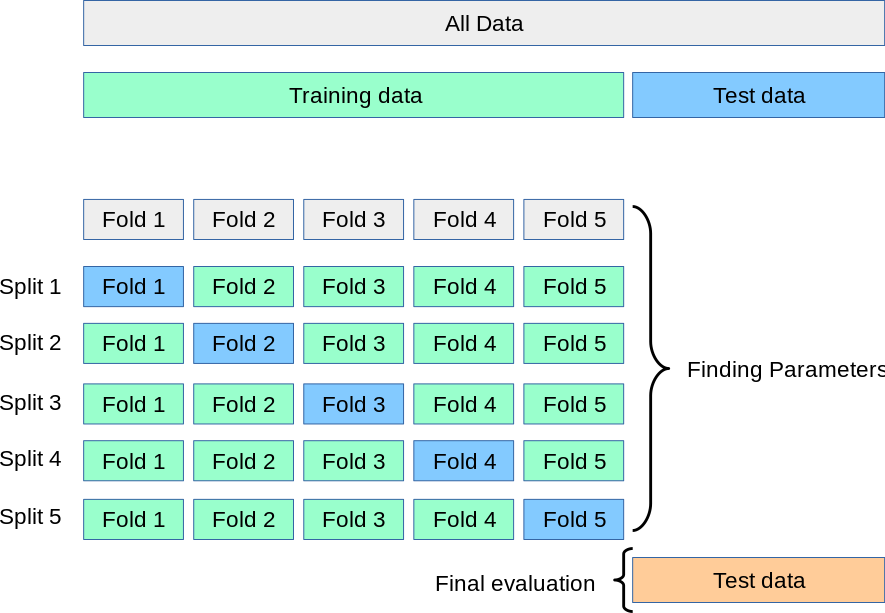

In [ ]:
# Cross-Validation (crossval)
# GridSearch CV = Crossval + Подбор настроек (гиперпараметров)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()

param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "max_depth": [None, 2, 5],
    "criterion": ["squared_error", "absolute_error", "poisson"],
}

gs = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
gs.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 2, 5],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
4*3*3*5

180

# Градиентный спуск

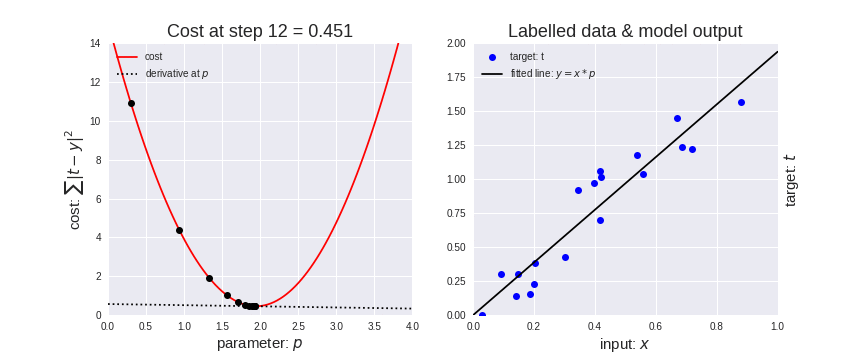